# **DADOS DE CUSTOS MÉDICOS**

In [10]:
#instalar pycaret

In [1]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Objetivo da segunda analise : 
##    Construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [2]:
from pycaret.classification import *

In [3]:
class_setup = setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = 2)

,Description,Value
0,session_id,5998
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [5]:
todos = compare_models(n_select = 18, turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9754,0.9941,0.9725,0.9151,0.9404,0.9251,0.9277,1.6970
lightgbm,Light Gradient Boosting Machine,0.9743,0.9924,0.9614,0.9192,0.9373,0.9213,0.9237,0.2160
xgboost,Extreme Gradient Boosting,0.9711,0.9919,0.9447,0.9175,0.9285,0.9105,0.9125,0.2070
gbc,Gradient Boosting Classifier,0.9679,0.9905,0.9444,0.9042,0.9204,0.9004,0.9035,0.1530
rbfsvm,SVM - Radial Kernel,0.9657,0.9856,1.0000,0.8622,0.9228,0.9014,0.9079,0.0390
lr,Logistic Regression,0.9615,0.9887,0.9167,0.9000,0.9025,0.8787,0.8831,0.5470
mlp,MLP Classifier,0.9615,0.9885,0.9225,0.8949,0.9037,0.8798,0.8836,2.5330
dt,Decision Tree Classifier,0.9583,0.9278,0.8781,0.9044,0.8900,0.8643,0.8652,0.0190
svm,SVM - Linear Kernel,0.9572,0.0000,0.9170,0.8818,0.8909,0.8647,0.8710,0.0200
ada,Ada Boost Classifier,0.9561,0.9880,0.8944,0.8880,0.8885,0.8613,0.8633,0.1050


In [ ]:
#?compare_models

In [6]:
top7_tunados = [tune_model(i) for i in todos[:7]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9681,0.9942,0.9444,0.8947,0.9189,0.8991,0.8996
1,0.9574,0.9788,0.8333,0.9375,0.8824,0.8565,0.8587
2,0.9574,0.9890,0.9444,0.8500,0.8947,0.8682,0.8701
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9574,0.9942,0.8889,0.8889,0.8889,0.8626,0.8626
5,0.9787,0.9965,0.9474,0.9474,0.9474,0.9340,0.9340
6,0.9785,1.0000,0.8889,1.0000,0.9412,0.9281,0.9305
7,0.9570,0.9741,1.0000,0.8182,0.9000,0.8730,0.8801
8,0.9677,0.9933,0.9444,0.8947,0.9189,0.8988,0.8993
9,0.9677,0.9970,1.0000,0.8571,0.9231,0.9028,0.9071


In [7]:
top7_tunados

 LGBMClassifier(bagging_fraction=0.8, bagging_freq=6, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
                importance_type='split', learning_rate=0.089, max_depth=-1,
                min_child_samples=65, min_child_weight=0.001, min_split_gain=0,
                n_estimators=260, n_jobs=2, num_leaves=100, objective=None,
                random_state=5998, reg_alpha=0.05, reg_lambda=0.15, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.059, max_delta_step=0, max_depth=4,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=110, n_jobs=2, num_parallel_tree=1,
               objective='binary:log

In [8]:
import pandas as pd
results = pd.DataFrame()

In [9]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i]) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9552,0.9917,0.9677,0.8571,0.9091,0.8795,0.8824


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9552,0.9891,0.9677,0.8571,0.9091,0.8795,0.8824


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9453,0.9855,0.9785,0.8198,0.8922,0.8559,0.8619


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9552,0.9889,0.9570,0.8641,0.9082,0.8787,0.8807


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.9453,0.9745,0.9785,0.8198,0.8922,0.8559,0.8619


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9453,0.9733,0.9785,0.8198,0.8922,0.8559,0.8619


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.9577,0.9879,0.9677,0.8654,0.9137,0.8858,0.8882


In [10]:
combinacao_soft = blend_models(top7_tunados, method = 'soft') 
# os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9971,1.0000,0.9000,0.9474,0.9341,0.9361
1,0.9894,0.9985,1.0000,0.9474,0.9730,0.9664,0.9669
2,0.9787,0.9898,1.0000,0.9000,0.9474,0.9341,0.9361
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9681,0.9942,0.9444,0.8947,0.9189,0.8991,0.8996
5,0.9681,0.9986,0.9474,0.9000,0.9231,0.9030,0.9034
6,0.9892,1.0000,0.9444,1.0000,0.9714,0.9648,0.9654
7,0.9247,0.9867,1.0000,0.7200,0.8372,0.7899,0.8080
8,0.9785,0.9919,1.0000,0.9000,0.9474,0.9339,0.9359
9,0.9785,0.9993,1.0000,0.9000,0.9474,0.9339,0.9359


In [11]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.0000,1.0000,0.9000,0.9474,0.9341,0.9361
1,0.9894,0.0000,1.0000,0.9474,0.9730,0.9664,0.9669
2,0.9787,0.0000,1.0000,0.9000,0.9474,0.9341,0.9361
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9681,0.0000,0.9444,0.8947,0.9189,0.8991,0.8996
5,0.9787,0.0000,0.9474,0.9474,0.9474,0.9340,0.9340
6,0.9892,0.0000,0.9444,1.0000,0.9714,0.9648,0.9654
7,0.9247,0.0000,1.0000,0.7200,0.8372,0.7899,0.8080
8,0.9785,0.0000,1.0000,0.9000,0.9474,0.9339,0.9359
9,0.9785,0.0000,1.0000,0.9000,0.9474,0.9339,0.9359


Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta. 

In [12]:
preds = predict_model(combinacao_soft, data = dados)

In [13]:
preds.sample(20).sort_values(by = 'Score')

,age,sex,bmi,children,smoker,region,charges,Label,Score
688,47,female,24.100,1,no,southwest,26236.57997,yes,0.6214
1206,59,female,34.800,2,no,southwest,36910.60803,yes,0.6594
1176,52,female,24.130,1,yes,northwest,23887.66270,yes,0.8907
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.8946
1026,19,male,26.030,1,yes,northwest,16450.89470,yes,0.9568
131,61,female,22.040,0,no,northeast,13616.35860,no,0.9840
560,46,female,19.950,2,no,northwest,9193.83850,no,0.9869
264,53,female,38.060,3,no,southeast,20462.99766,no,0.9921
277,22,female,24.300,0,no,southwest,2150.46900,no,0.9931
1330,57,female,25.740,2,no,southeast,12629.16560,no,0.9966


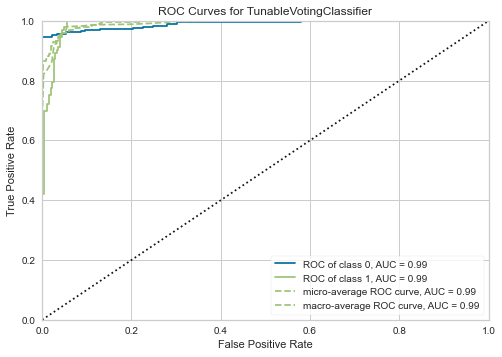

In [14]:
plot_model(combinacao_soft)

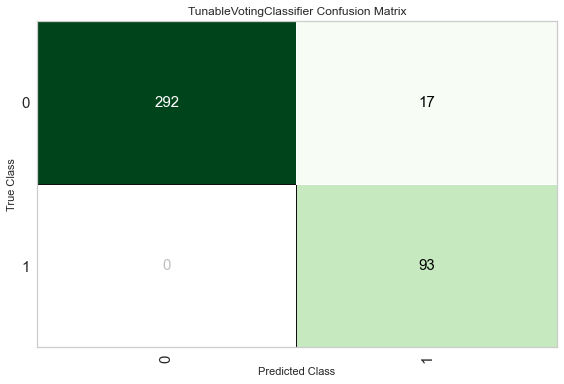

In [15]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

In [16]:
pred = predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9577,0.9902,1.0000,0.8455,0.9163,0.8882,0.8938


## Utilizando a função predict_proba podemos tomar os valores das probabilidades dada pelo modelo. E podemos ver que o que acontece na variável 'Score' é que a probabilidade apresentada é sempre a de pertencer a resposta classificada, por isso então a suposta incoerência nos valores observados. 

## Utilizando o modelo selecionado na propria base para identificar possiveis fraudadores

In [17]:
pred = predict_model(combinacao_soft, data = dados)

## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [18]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

,age,sex,bmi,children,smoker,region,charges,Label,Score
340,24,female,27.600,0,no,southwest,18955.22017,yes,0.9687
1195,19,female,27.930,3,no,northwest,18838.70366,yes,0.9199
1104,37,male,29.800,0,no,southwest,20420.60465,yes,0.9164
355,46,male,27.600,0,no,southwest,24603.04837,yes,0.9113
115,60,male,28.595,0,no,northeast,30259.99556,yes,0.9061
140,34,male,22.420,2,no,northeast,27375.90478,yes,0.8986
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.8946
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.8785
219,24,female,23.210,0,no,southeast,25081.76784,yes,0.8330
1003,48,male,29.600,0,no,southwest,21232.18226,yes,0.8191


## Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [19]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

,age,sex,bmi,children,smoker,region,charges,Label,Score
340,24,female,27.600,0,no,southwest,18955.22017,yes,0.9687
1195,19,female,27.930,3,no,northwest,18838.70366,yes,0.9199
1104,37,male,29.800,0,no,southwest,20420.60465,yes,0.9164
355,46,male,27.600,0,no,southwest,24603.04837,yes,0.9113
115,60,male,28.595,0,no,northeast,30259.99556,yes,0.9061
140,34,male,22.420,2,no,northeast,27375.90478,yes,0.8986
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.8946
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.8785
219,24,female,23.210,0,no,southeast,25081.76784,yes,0.8330
1003,48,male,29.600,0,no,southwest,21232.18226,yes,0.8191


In [20]:
modelo_final = finalize_model(combinacao_soft)

In [21]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                            momentum=0.9,
                                                                            n_iter_no_change=10,
                                                                            nesterovs_m

In [25]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-smoker')
 
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [23]:
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 20000
 
É fumante: SIM, com probabilidade 84.58%


In [24]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 20000
 
É fumante: SIM, com probabilidade 84.58%
